<a href="https://colab.research.google.com/github/SamyarZamani/fashion-classifier/blob/main/mainfile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tensorflow matplotlib

# importing dataset & splitting to train-test

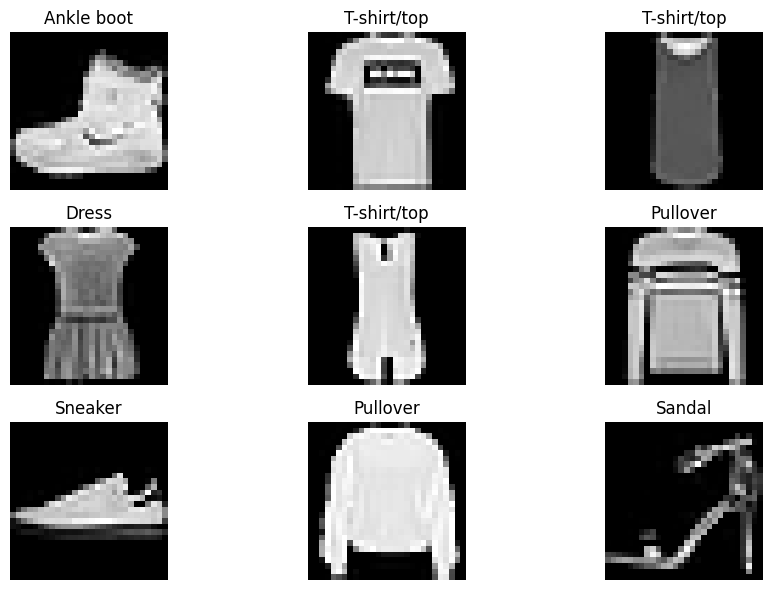

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 6))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

# preprocessing

In [2]:
x_train = x_train / 255.0
x_test = x_test / 255.0

# defining model & trainig it

In [3]:
model = tf.keras.Sequential([
    tf.keras.layers.Reshape((28, 28, 1), input_shape=(28, 28)),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 51s 29ms/step - accuracy: 0.7692 - loss: 0.6406 - val_accuracy: 0.8700 - val_loss: 0.3689
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.8883 - loss: 0.3104 - val_accuracy: 0.8897 - val_loss: 0.2984
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9045 - loss: 0.2599 - val_accuracy: 0.9038 - val_loss: 0.2656
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9142 - loss: 0.2295 - val_accuracy: 0.9057 - val_loss: 0.2558
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 48s 28ms/step - accuracy: 0.9281 - loss: 0.1933 - val_accuracy: 0.9122 - val_loss: 0.2390


# pridiction part

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9026 - loss: 0.2643
Test Accuracy: 0.90
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


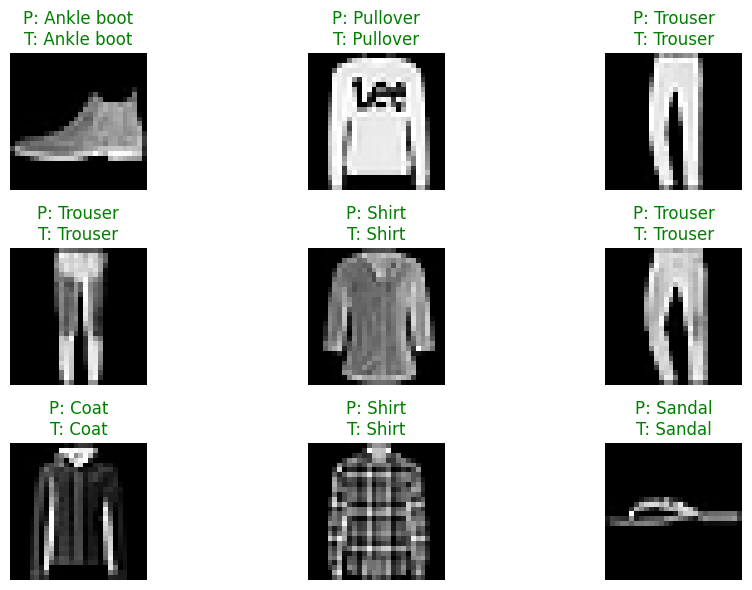

In [4]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.2f}")

predictions = model.predict(x_test)

plt.figure(figsize=(10, 6))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i], cmap='gray')
    predicted_label = class_names[predictions[i].argmax()]
    true_label = class_names[y_test[i]]
    color = 'green' if predicted_label == true_label else 'red'
    plt.title(f"P: {predicted_label}\nT: {true_label}", color=color)
    plt.axis('off')
plt.tight_layout()
plt.show()